In [65]:
%matplotlib inline
import numpy as np # a package is for scientific computing
import scipy # open-source software for mathematics, science, and engineering (higher level than numpy)
import sklearn # machine learning package
import matplotlib as mpl
import matplotlib.pyplot as plt # plotting tools
import seaborn as sns # nicer plot defaults
import pandas as pd # for making easy-to-use data structures
import pickle
from sklearn.externals import joblib
from matplotlib.pyplot import pie, bar,axis, show
from sklearn.preprocessing import LabelEncoder

In [107]:
#import customer demog data
cust_demog = pd.read_csv('../data_churn1/cust_demog.csv')

#replace NaN values with the median of the income
cust_demog.income =cust_demog['income'].fillna(float(2000))
cust_demog.head(5)

,custid,gender,marital,edustat,jobtype,income,age,inacl1m,inacl2m,inacl3m,inac3m,inacfull
0,18438542,F,MARRIED,COLLEGE,PRIVATE SECTOR,1860.0,45,False,False,False,False,False
1,19225464,M,SINGLE,COLLEGE,PRIVATE SECTOR,1494.0,31,False,False,False,False,False
2,19379348,M,SINGLE,UNIVERSITY,PRIVATE SECTOR,2000.0,43,True,True,True,True,True
3,22580189,F,SINGLE,COLLEGE,PRIVATE SECTOR,816.0,37,False,False,False,False,False
4,24172775,M,MARRIED,UNIVERSITY,PUBLIC SECTOR,3500.0,27,False,False,False,False,False


In [108]:
# encode categogies as numeric values
lb_make = LabelEncoder()
cust_demog["inacfull"] = lb_make.fit_transform(cust_demog["inacfull"])
cust_demog['gender']=lb_make.fit_transform(cust_demog["gender"])
cust_demog["jobtype"] = lb_make.fit_transform(cust_demog["jobtype"])
cust_demog['edustat']=lb_make.fit_transform(cust_demog["edustat"])
cust_demog['marital']=lb_make.fit_transform(cust_demog["marital"])
cust_demog['inacl1m']=lb_make.fit_transform(cust_demog["inacl1m"])
cust_demog['inacl2m']=lb_make.fit_transform(cust_demog["inacl2m"])
cust_demog['inacl3m']=lb_make.fit_transform(cust_demog["inacl3m"])
cust_demog['inac3m']=lb_make.fit_transform(cust_demog["inac3m"])
cust_demog.head(5)

,custid,gender,marital,edustat,jobtype,income,age,inacl1m,inacl2m,inacl3m,inac3m,inacfull
0,18438542,0,2,0,4,1860.0,45,0,0,0,0,0
1,19225464,1,3,0,4,1494.0,31,0,0,0,0,0
2,19379348,1,3,7,4,2000.0,43,1,1,1,1,1
3,22580189,0,3,0,4,816.0,37,0,0,0,0,0
4,24172775,1,2,7,5,3500.0,27,0,0,0,0,0


In [109]:
# change categoricals data type as 'category'
cust_demog["gender"] = cust_demog["gender"].astype('category') 
cust_demog["marital"] = cust_demog["marital"].astype('category') 
cust_demog["edustat"] = cust_demog["edustat"].astype('category') 
cust_demog["jobtype"] = cust_demog["jobtype"].astype('category') 
cust_demog["inacfull"] = cust_demog["inacfull"].astype('category') 
cust_demog["inacl1m"] = cust_demog["inacl1m"].astype('category') 
cust_demog["inacl2m"] = cust_demog["inacl2m"].astype('category') 
cust_demog["inacl3m"] = cust_demog["inacl3m"].astype('category') 
cust_demog["inac3m"] = cust_demog["inac3m"].astype('category') 


In [117]:
#randomly split data as training and testing sets
from sklearn.model_selection import train_test_split

X = cust_demog.iloc[:,1:11]
y = cust_demog.inacfull

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=1)

In [5]:
#Pickle the training and testing datasets 
X_train.to_pickle('X_tr.pkl')
X_test.to_pickle('X_ts_.pkl')
y_train.to_pickle('y_tr.pkl')
y_test.to_pickle('y_ts.pkl')

NameError: name 'X_train' is not defined

In [112]:
X_tr= joblib.load('X_tr.pkl') 
y_tr=joblib.load('y_tr.pkl')
X_test=joblib.load('X_ts_.pkl')
y_test=joblib.load('y_ts.pkl')

In [113]:
print(X_tr.shape, y_tr.shape, X_test.shape, y_test.shape)

((30363, 10), (30363,), (13014, 10), (13014,))


In [11]:
#over sample the minority class using SMOTE
from imblearn.over_sampling import SMOTE 
from imblearn import under_sampling, over_sampling
sm = SMOTE(random_state=1, ratio = 0.25)
x_tr_res, y_tr_res = sm.fit_sample(X_tr, y_tr)

/home/rna1/anaconda2/envs/myprojects_env/lib/python2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


In [ ]:
print y_tr.value_counts(), np.bincount(y_tr_res),y_tr_res.shape, x_tr_res.shape

In [111]:
joblib.dump(x_tr_res, 'x_tr_res.pkl') 
joblib.dump(y_tr_res,'y_tr_res.pkl')

NameError: name 'x_tr_res' is not defined

In [114]:
X_tr =joblib.load('x_tr_res.pkl') 
y_tr =joblib.load('y_tr_res.pkl')

In [27]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=0, max_depth=9)
model.fit(X_tr, y_tr)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [78]:
#pickle the fitted Decision tree model
pred_churn= pickle.dumps(model)
joblib.dump(model, 'pred_churn.pkl') 
# to load the model model = joblib.load('filename.pkl') 

['pred_churn.pkl']

In [3]:
model = joblib.load('pred_churn.pkl') 
#perform prediction with test set
y_test_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_test_pred)

0.98985707699400649

In [22]:
Xvar= X_test.columns.values
print(Xvar)

['gender' 'marital' 'edustat' 'jobtype' 'income' 'age' 'inacl1m' 'inacl2m'
 'inacl3m' 'inac3m']


In [6]:
with open("churn_classifier.txt", "w") as f:
    f = tree.export_graphviz(model, out_file=f)

In [62]:
y_test_pred = model.predict(X_test.iloc[0:1,:])
print(y_test_pred)

[0]


In [63]:
proba=model.predict_proba(X_test.iloc[0:1,:])
proba

array([[ 1.,  0.]])

In [17]:
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

importances = model.feature_importances_
# std = np.std([tree.feature_importances_ for tree in model.],
#              axis=0)
indices = np.argsort(importances)[::-1]
terms= X_test.columns.values
# Print the feature ranking
print("Feature ranking:")
for f in range(X_test.shape[1]):
    if importances[indices[f]] > 0:
        print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
        print ("feature name: ", terms[indices[f]])

Feature ranking:
1. feature 8 (0.902662)
('feature name: ', 'inacl3m')
2. feature 5 (0.031856)
('feature name: ', 'age')
3. feature 4 (0.029247)
('feature name: ', 'income')
4. feature 2 (0.017642)
('feature name: ', 'edustat')
5. feature 3 (0.009182)
('feature name: ', 'jobtype')
6. feature 0 (0.005923)
('feature name: ', 'gender')
7. feature 1 (0.003487)
('feature name: ', 'marital')


In [11]:
#check confusion matrix
from sklearn.metrics import confusion_matrix

cf = pd.DataFrame(
    confusion_matrix(y_test, y_test_pred),
    columns=['Predicted Not churn', 'Predicted churn'],
    index=['True Not churn', 'True churn']
)
print(cf)

                Predicted Not churn  Predicted churn
True Not churn                12631              103
True churn                       29              251


In [18]:
#import the automatic payments data
aut_payment = pd.read_csv('../data_churn1/aut_trans.csv')
aut_payment.head()

,cust_id,trans_date,tot_amount,tot_number
0,20897469,26-Oct-14,226.5,3
1,8596362,9-Mar-15,96.0,1
2,21319463,16-Apr-15,30.1,1
3,7540825,16-Apr-15,34.5,1
4,14799757,4-May-15,191.0,1


In [19]:
#convert the tran_date column to datetime type
aut_payment['trans_date'] = pd.to_datetime(aut_payment['trans_date'])
aut_payment.rename(columns={'cust_id': 'custid', 'tot_number': 'tot_num'}, inplace=True)


,custid,trans_date,tot_amount,tot_num
0,20897469,2014-10-26,226.5,3
1,8596362,2015-03-09,96.0,1
2,21319463,2015-04-16,30.1,1
3,7540825,2015-04-16,34.5,1
4,14799757,2015-05-04,191.0,1


In [20]:
joblib.dump(aut_payment,'aut_payment.pkl')

['aut_payment.pkl']

In [23]:
aut_payment =joblib.load('aut_payment.pkl')
aut_payment.dtypes

custid                 int64
trans_date    datetime64[ns]
tot_amount           float64
tot_num                int64
dtype: object

In [111]:
from datetime import date, timedelta
import datetime

startdate = aut_payment.trans_date.min()
end=aut_payment.trans_date.max()

sub_aut_payment=pd.DataFrame(columns=[u'custid', u'tot_amount', u'tot_num'])
for k in range(1,3):
    if k == 12:
        endate = end
    else:
        enddate = startdate + timedelta(days=30*k)
    
    mask = (aut_payment['trans_date'] >=startdate) & (aut_payment['trans_date'] <= enddate)
    sub= aut_payment.loc[mask]
    sub2 =sub.groupby(['custid'], as_index=False).sum()
    #print(sub.loc[sub['custid'] ==1592653])
    startdate=enddate 
    #print(sub2)
    sub_aut_payment = sub_aut_payment.append(sub2, ignore_index=True)
sub_aut_payment.head(15)

,custid,tot_amount,tot_num
0,1587995,27.00,1
1,1592653,306.10,7
2,1608485,67.70,1
3,1623599,608.40,11
4,1719473,212.80,2
5,1747077,8.00,1
6,1754081,233.80,2
7,1760330,75.40,1
8,1763718,466.80,15
9,1783498,335.20,8


In [113]:
sub_aut_payment.shape

(9876, 3)

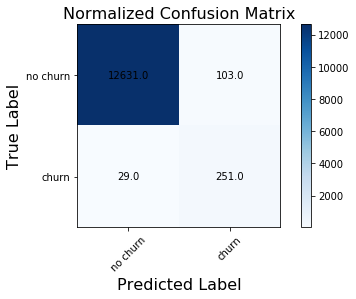

In [13]:
def plot_confusion_matrix(cm, ylabel, xlabel):
  plt.figure()
  cmap = plt.cm.Blues
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title('Normalized Confusion Matrix', fontsize=16)
  plt.colorbar()
  for (i, j), z in np.ndenumerate(cm):
    plt.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')
# write cm values on grid
  tick_labels = ['no churn', 'churn']
  tick_marks = np.arange(len(tick_labels))
  plt.xticks(tick_marks, tick_labels, rotation=45)
  plt.yticks(tick_marks, tick_labels)
  plt.tight_layout()
  plt.ylabel(ylabel, fontsize=16)
  plt.xlabel(xlabel, fontsize=16)

#here's how you input to the function:
plot_confusion_matrix(cf, 'True Label', 'Predicted Label')

In [46]:
from sklearn.metrics import precision_recall_fscore_support
precision, tp_rate, f_beta, pos_label = precision_recall_fscore_support(y_test, y_test_pred, average='binary')
precision, tp_rate, f_beta, pos_label
# tp_rate= recall
#If pos_label is None, this function returns the average precision

(0.70903954802259883, 0.89642857142857146, 0.79179810725552047, None)

In [14]:
# # from mlxtend.plotting import plot_confusion_matrix
# import os
# binary = np.array(cf)

# # fig, ax = plot_confusion_matrix(conf_mat=binary)
# # plt.show()

      
# df_cm = pd.DataFrame(binary, range(2),range(2))
# #plt.figure(figsize = (10,7))
# ax = plt.axes()
# sns.set(font_scale=1.4)#for label size
# sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, ax = ax)# font size

# ax.set_title('confusion matrix')
# plt.show()

,cust_id,trans_date,tot_amount,tot_number
0,20897469,26-Oct-14,226.5,3
1,8596362,9-Mar-15,96.0,1
2,21319463,16-Apr-15,30.1,1
3,7540825,16-Apr-15,34.5,1
4,14799757,4-May-15,191.0,1


In [ ]:
aut_payment['trans_date'] = pd.to_datetime(aut_payment['trans_date'])
aut_payment.rename(columns={'cust_id': 'custid', 'tot_number': 'tot_num'}, inplace=True)
aut_payment.head()

In [9]:
df_merged = pd.merge(cust_demog,aut_payment,on = 'custid', how = 'inner')
df_merged.head(5)

,custid,gender,marital,edustat,jobtype,income,age,inacfull,inacl1m,inacl2m,inacl3m,inac3m,trans_date,tot_amount,tot_num
0,16650211,1,2,7,5,2000.0,31,0,0,0,0,0,2015-02-09,140.00,2
1,16650211,1,2,7,5,2000.0,31,0,0,0,0,0,2014-12-08,76.75,2
2,16650211,1,2,7,5,2000.0,31,0,0,0,0,0,2015-06-08,153.75,2
3,16650211,1,2,7,5,2000.0,31,0,0,0,0,0,2014-09-08,78.25,2
4,16650211,1,2,7,5,2000.0,31,0,0,0,0,0,2014-10-08,78.25,2


In [16]:
# from sklearn.cross_validation import  cross_val_score
# from sklearn.tree import export_graphviz

/home/rna1/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [23]:
# from sklearn import tree
# x = cust_demog.iloc[:,1:7]
# y = cust_demog.inacfull
# #x_train,x_test,y_train,y_test = cross_validation.train_test_split(x,y,test_size=0.3,random_state=0)

# depth = []

# for i in range(3,10):
#     clf = tree.DecisionTreeClassifier(max_depth=i, min_samples_leaf =2)
#     # Perform 7-fold cross validation 
#     scores = cross_val_score(estimator=clf, X=x, y=y, cv=7, n_jobs=2)
#     depth.append((i,scores.mean()))
# print(depth)
# clf.fit(X_tr, y_tr)

[(3, 0.97722295674784587), (4, 0.97719990411869362), (5, 0.97715379141925618), (6, 0.97703853199165958), (7, 0.97696936666306988), (8, 0.97694631403391752), (9, 0.97662355118181998)]


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [26]:
X = cust_demog.iloc[:,1:7]
y = cust_demog.inacfull

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1)

In [31]:
X.shape, y.shape, X_train.shape, y_train.shape, y_test.shape, X_test.shape

((43377, 6), (43377,), (30363, 6), (30363,), (13014,), (13014, 6))

,Predicted Not churn,Predicted churn
True Not churn,12728,6
True churn,280,0


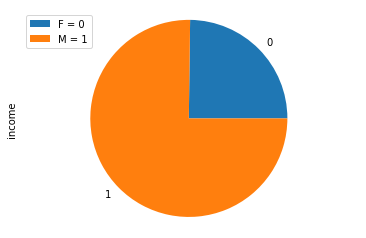

In [139]:
cust_demog.income.groupby(cust_demog.gender).sum().plot(kind='pie')
plt.axis('equal')
labels = ['F = 0','M = 1']
plt.legend(labels, loc="best")
plt.show()
#0 is F, 1 is M

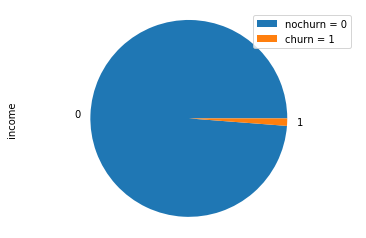

In [18]:
cust_demog.income.groupby(cust_demog.inacfull).sum().plot(kind='pie')
plt.axis('equal')
labels = ['nochurn = 0','churn = 1']
plt.legend(labels, loc="best")
plt.show()

Text(0,0.5,u'income')

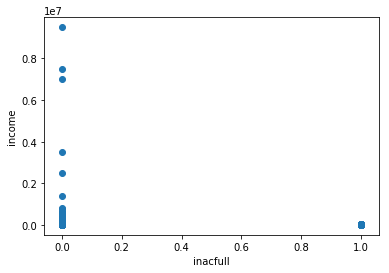

In [39]:
fig = plt.figure()
mpl.pyplot.scatter(cust_demog.inacfull, cust_demog.income)
ax = fig.add_subplot(111)
ax.set_xlabel('inacfull')
ax.set_ylabel('income')plt.legend(patches, labels, loc="best")


In [13]:
cust_demog.gender.dtypes, cust_demog.age.dtypes

(category, dtype('int64'))

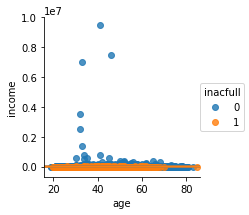

In [119]:
#sns.regplot(x="age", y="income", data=cust_demog);
#sns.lmplot(x="age", y="income", col="gender", data=cust_demog,col_wrap=2, size=3, );
sns.pairplot(cust_demog, x_vars=["age"], y_vars=["income"],
             hue="inacfull", size=3, aspect=1, kind="reg");

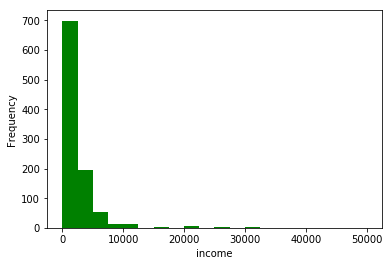

In [22]:
#select the inactive customers based on inacfull column
inac_cust = cust_demog.loc[cust_demog['inacfull'] == 1]
inac_cust.income.plot.hist(bins=20, facecolor='green')
plt.xlabel('income')
plt.show()

In [106]:
max(inac_cust.income),min(inac_cust.income)

NameError: name 'inac_cust' is not defined

In [35]:
atm = pd.read_csv('../data_churn1/atm.txt')
columns = ['custid', 'date', 'trans_amount']
atm_sub = pd.DataFrame(atm, columns=columns)
atm_sub.head()

,custid,date,trans_amount
0,18651424,05MAY2015:17:00:58,510.0
1,12827129,22APR2015:16:11:21,200.0
2,6985183,23NOV2014:10:15:21,400.0
3,12832710,15JUN2015:11:10:41,2000.0
4,11988373,16JUL2014:18:54:48,250.0


In [115]:
#call center data
cust_rel = pd.read_csv('../data_churn1/bank_rel.txt')


,cust_id,call_date,cs_login_num,cs_trans_num
0,1581413,31JUL2014:00:00:00,2,33
1,1605587,31JUL2014:00:00:00,1,25
2,1608485,31JUL2014:00:00:00,4,28
3,1629758,31JUL2014:00:00:00,1,10
4,1643155,31JUL2014:00:00:00,4,52


In [116]:
cust_rel.shape

(165029, 4)

In [6]:
#cc_trans= pd.read_csv('../data_churn1/cc_trans.txt')
#select the columns to be used
columns = ['custid', 'trans_date', 'trans_amount', 'online_trans', 'trans_type']
cc_trans = pd.DataFrame(df, columns=columns)
joblib.dump(cc_trans, 'cc_trans.pkl') 

In [59]:
cc_trans['trans_date'] = pd.to_datetime(df['trans_date'])

In [72]:
cc_trans.head(3)

,custid,trans_date,trans_amount,online_trans,trans_type
0,23686158,2014-07-10,12.00,0,AV
1,13546047,2014-06-07,35.38,0,AV
2,13653775,2014-10-08,2091.00,0,AV


In [98]:
columns = ['custid', 'trans_date', 'trans_amount', 'online_trans']
cc_tr = pd.DataFrame(df, columns=columns)

In [103]:
cc_tr["online_trans"] = cc_tr["online_trans"].astype('category') 

In [104]:
joblib.dump(cc_tr, 'cc_trans3.pkl') 
# use cc_trans3.pkl for analysis and prediction

['cc_trans3.pkl']

In [105]:
cc_tr.dtypes

custid             int64
trans_date        object
trans_amount     float64
online_trans    category
dtype: object